# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [3]:
import pandas as pd
import numpy as np

In [4]:
data_iris = 'data/Iris_Data.csv'
df = pd.read_csv(data_iris, skipinitialspace = True)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


O número de pontos (linhas)

In [7]:
df.shape

(150, 5)

O nome das colunas

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Os tipos associados a cada coluna

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [10]:
df['species'] = df['species'].apply(lambda x: x.replace('Iris-',''))

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

A quantidade de cada espécie presente na base.

In [12]:
df.groupby('species')['species'].count()

species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [14]:
dfse = df[df['species'] == 'setosa'].copy()
dfse.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [15]:
dfvi = df[df['species'] == 'virginica'].copy()
dfvi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [16]:
dfve = df[df['species'] == 'versicolor'].copy()
dfve.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela

In [17]:
df.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#matplotlib.style.use('ggplot')

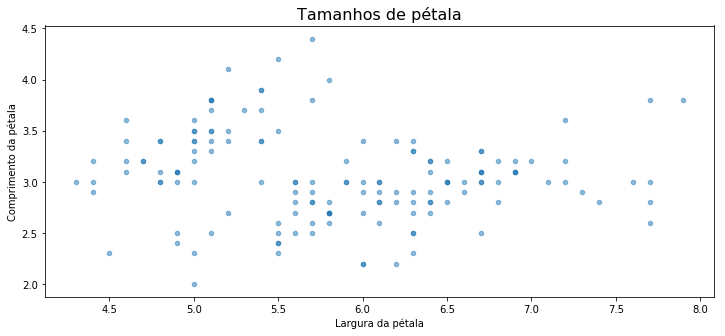

In [27]:
df.plot.scatter(x = 'sepal_length', y = 'sepal_width', figsize = (12,5), alpha=0.5)
plt.xlabel('Largura da pétala')
plt.ylabel('Comprimento da pétala')
plt.title('Tamanhos de pétala', fontsize=16);

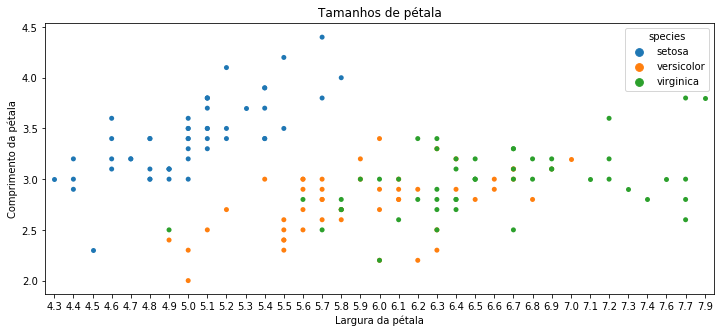

In [28]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.stripplot(x='sepal_length', y='sepal_width', hue='species', data=df, ax=ax)
ax.set(xlabel='Largura da pétala', ylabel='Comprimento da pétala', title = 'Tamanhos de pétala')
ax.plot();

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

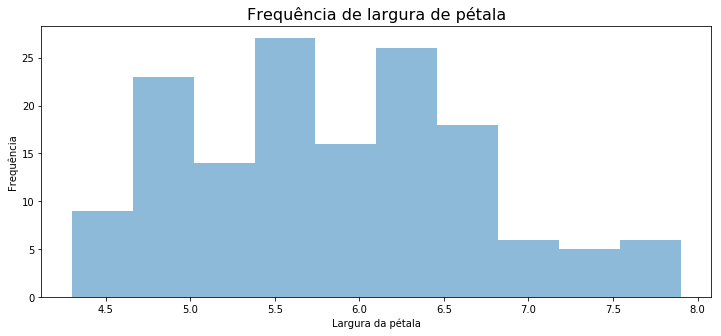

In [29]:
df['sepal_length'].plot.hist(figsize = (12,5), alpha=0.5)
plt.xlabel('Largura da pétala')
plt.ylabel('Frequência')
plt.title('Frequência de largura de pétala', fontsize=16);

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

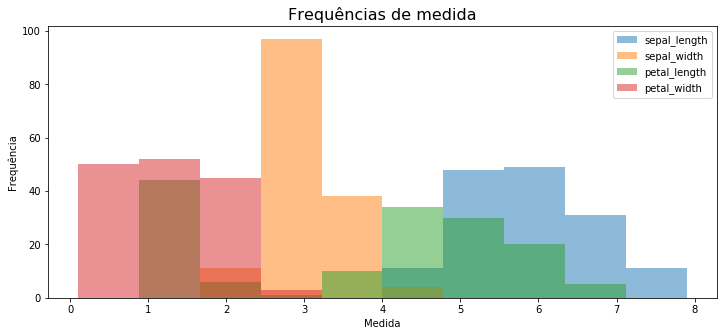

In [30]:
df.iloc[:,:4].plot.hist(figsize = (12,5), alpha=0.5)
plt.xlabel('Medida')
plt.ylabel('Frequência')
plt.title('Frequências de medida', fontsize=16);

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

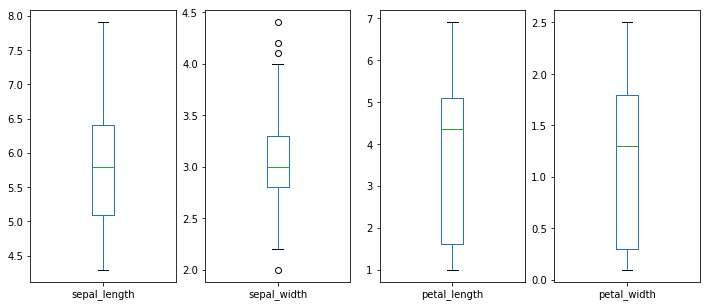

In [31]:
df.plot.box(figsize = (12,5), subplots=True);

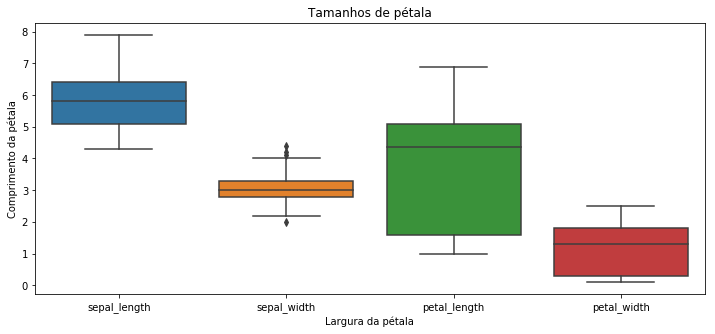

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.boxplot(data=df, ax=ax)
ax.set(xlabel='Largura da pétala', ylabel='Comprimento da pétala', title = 'Tamanhos de pétala')
ax.plot();

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [33]:
dfa = df
dfa = dfa.set_index('species')
dfa = dfa.stack()
dfa = dfa.to_frame()
dfa = dfa.reset_index()
dfa = dfa.rename(columns={0:'size', 'level_1':'measurement'})

In [34]:
dfa.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


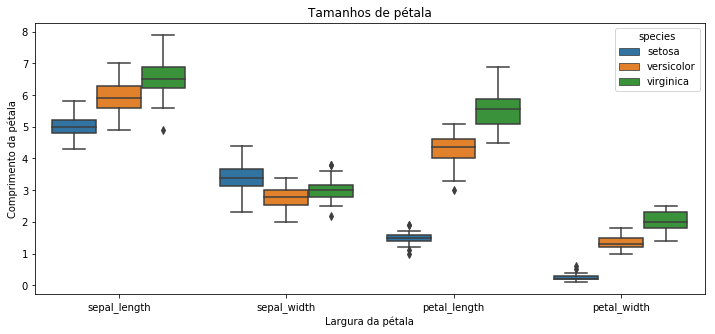

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.boxplot(x='measurement', y='size',hue='species', data=dfa)
ax.set(xlabel='Largura da pétala', ylabel='Comprimento da pétala', title = 'Tamanhos de pétala')
ax.plot();

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

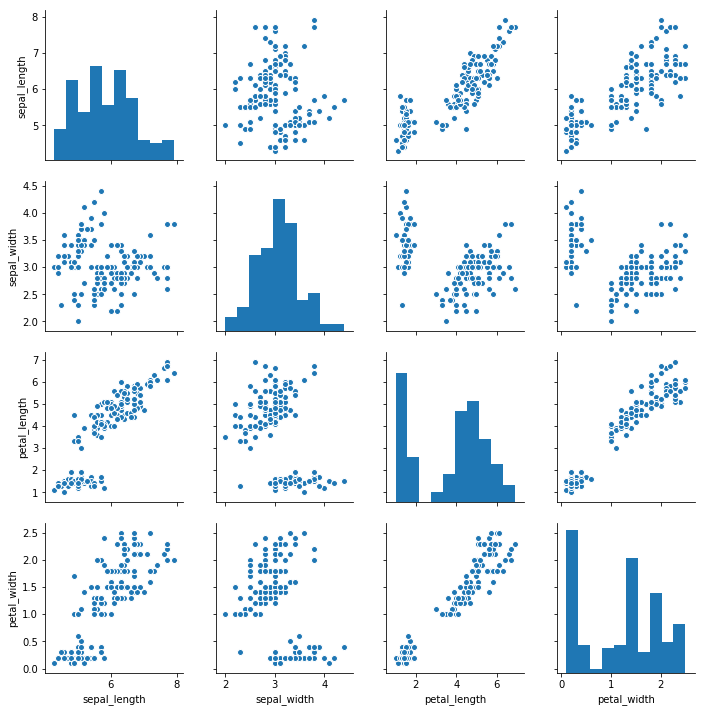

In [36]:
sns.pairplot(df);